## Этап 1. Импортирование библиотек, данных. Знакомство с данными.

### 1.1 Импортирование библиотек

Импортируем необходимые библиотеки для нашей работы:

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly import graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.2 Чтение файлов и знакомство с данными

In [2]:
data = pd.read_csv('gym_churn.csv')

Посмотрим на 10 случайных строк датасета:

In [3]:
data.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2305,0,1,0,1,1,6,1,28,119.20,6.00,1,1.74,1.63,0
3257,1,1,1,0,1,1,0,29,42.41,1.00,2,2.99,3.04,0
1706,1,1,1,1,1,1,0,31,83.44,1.00,1,1.38,1.36,0
805,0,0,0,0,1,1,0,29,147.44,1.00,2,3.01,2.95,0
1014,1,1,0,0,1,1,1,37,76.26,1.00,2,2.47,2.40,0
1806,0,0,1,0,0,1,1,27,92.05,1.00,3,1.44,0.67,1
1104,1,1,1,1,1,6,1,25,217.95,5.00,6,2.08,2.19,0
2213,0,1,1,0,1,12,0,29,69.75,11.00,2,1.09,1.05,0
340,1,1,0,0,0,6,1,29,116.35,6.00,4,1.95,1.84,0
1119,1,1,0,1,1,1,1,29,234.93,1.00,6,1.42,1.51,0


Набор данных включает следующие поля:
* 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:
* **Данные клиента за предыдущий до проверки факта оттока месяц:**

    * 'gender' — пол;
    * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * 'Phone' — наличие контактного телефона;
    * 'Age' — возраст;
    * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).


* **Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**

    * 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    * 'Group_visits' — факт посещения групповых занятий;
    * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Для удобства дальнейшей работы, изменим регистр столбцов на нижний:

In [4]:
data.columns = data.columns.str.lower()

Посмотрим на общую информацию по таблице:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
print('Данные содержат: {} строк;\n\t\t {} столбцов;\n\t\t {} дубликатов;\n\t\t {} пропусков.'.format(data.shape[0],
                                                                                        data.shape[1],
                                                                                        data.duplicated().sum(),
                                                                                        data.isnull().sum().sum()))

Данные содержат: 4000 строк;
		 14 столбцов;
		 0 дубликатов;
		 0 пропусков.


**Вывод:** На первый взгляд данные качественные, типы данных соответствующие. Датасет содержит 4000 строк, 14 столбцов, дубликаты и пропуски отсутствуют.

## Этап 2. Исследовательский анализ данных (EDA)

### 2.1 Общая статистическая информация

Познакомимся с общей статистической информацией:

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00


Познакомившись с данной таблицей в транспонированном виде, можно сделать следующие выводы:
* Примерно равное количество данных между мужчинами и женщинами;
* 85% проживают или работают рядом с фитнес-центром;
* Примерно равно количество данных между сотрудниками компаний-партнеров и кто не является партнером;
* 31% пришли по акции "приведи друга";
* 90% предоставили данные своих контактных номеров;
* 4.7% средняя длительность действующего абонемента;
* 41% посещает групоовые занятия;
* 29 лет в среднем , занимающимся в фитнес-центре;
* 147 денежных единиц в среднем сумарная выручка от других услуг фитнес-центра;
* 4.3 месяца в среднем до окончания текущего действующего абонемента;
* 3.7 месяца в среднем время с момента первого обращения в фитнес-центр;
* около 2 раз в неделю в среднем посещают за все время с начала действия абонемента;
* около 2 раз в неделю в среднем посещают за прошлый месяц;
* 27% отток в текущем месяце.

### 2.2 Средние значения признаков в двух группах

Посмотрим более подробно на средние значения по признакам, среди тех, кто остался и тех, кто ушел:

In [8]:
data.groupby('churn').mean().T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


Проанализировав данную таблицу можно отметить:
* По полу примерное равное значение среднего;
* Ближе живущие и работающие слегка реже попадают в отток;
* Сотрудники компаний-партнеров реже уходят в отток;
* Отток меньше у тех, кто пришел по акции "приведи друга";
* Нет различий между группами, среди тех, кто оставил телефоны;
* Средний возраст, у тех, кто остался 30 лет, в то время, те кто уходят имеют средний возраст на 3 года меньше, 27 лет;
* Допольнительная выручка больше у тех, кто остался, 158 ден.ед, против 115 ден.ед;
* Средний срок действия абонемента у тех, кто остался больше 5 месяцев, в то время как у тех кто уходит, средний срок действия абонемента, меньше 2 месяцев;
* Средний срок  с времени первого обращения около 5 месяцев,среди тех, кто остался, в то время как у оттока, менее месяца;
* Те кто остался в среднем имеют выше среднюю частоту посещений в неделю, чем те, у которых отток;
* Среди тех, кто отсался, почти в 2 раза выше среднее значение средней частоты посещений в неделю за предыдущий месяц;

###  2.3 Cтолбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

Создадим функцию для построение столбчатых гистограмм:

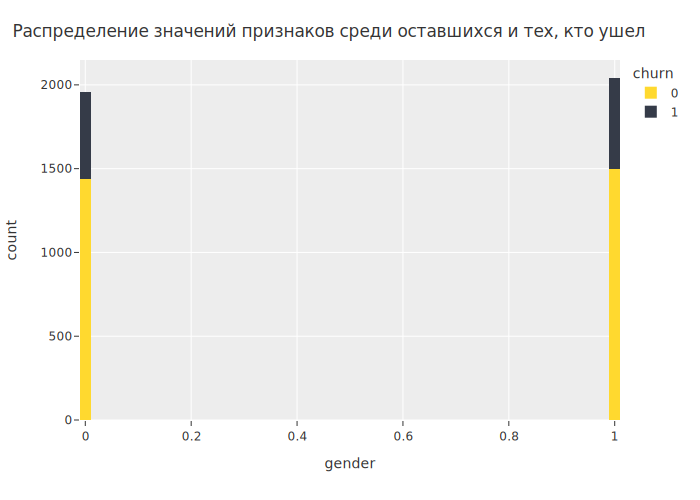

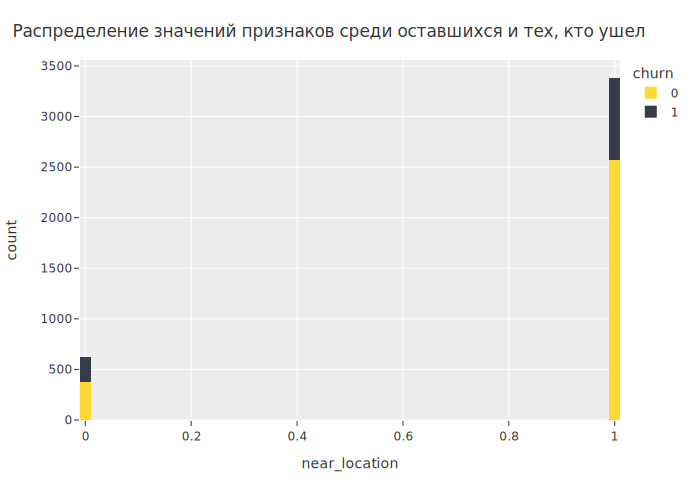

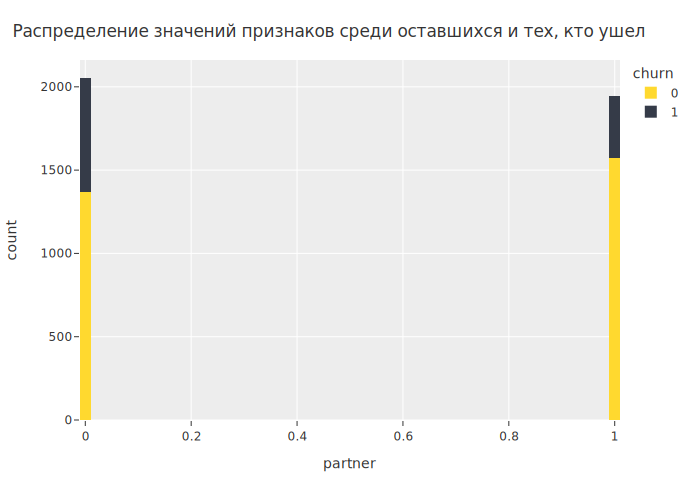

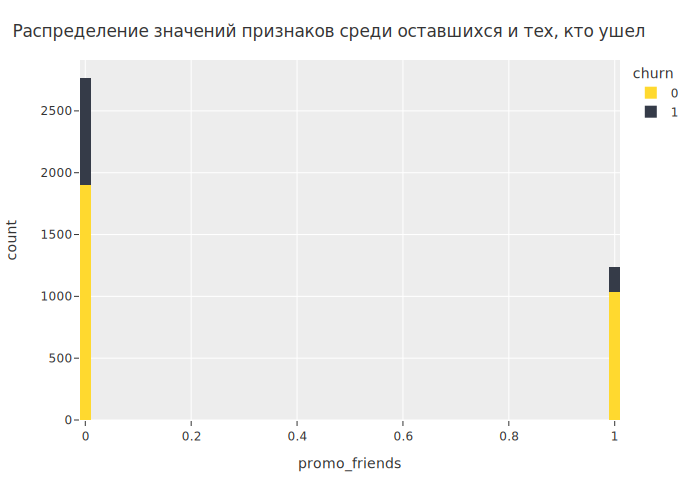

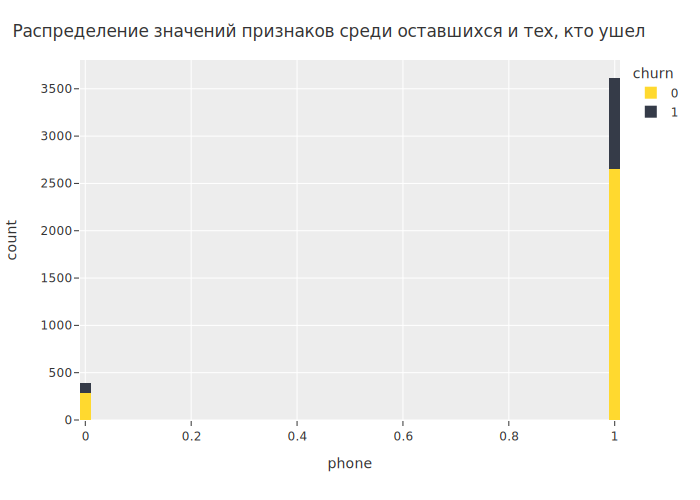

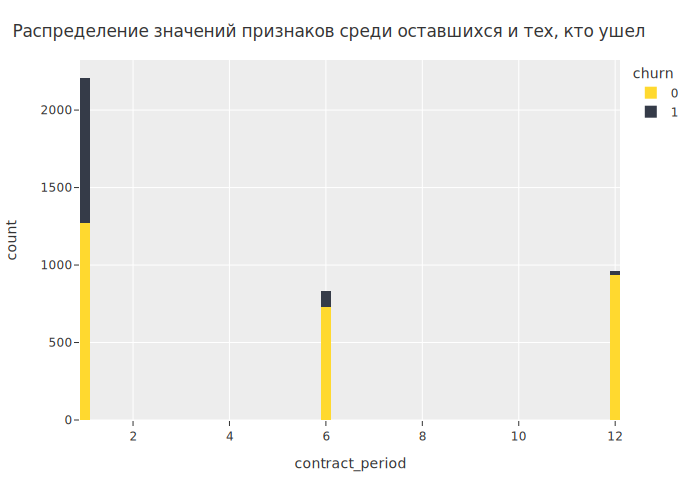

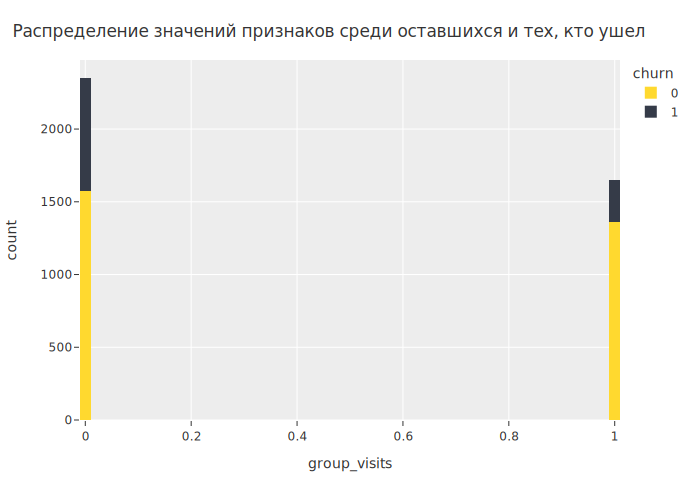

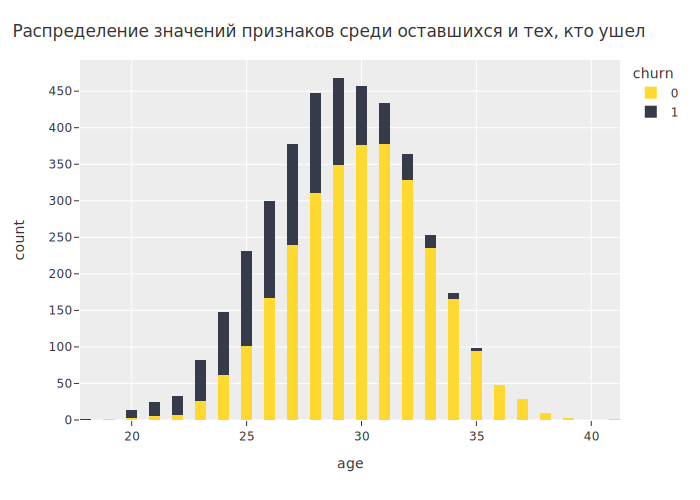

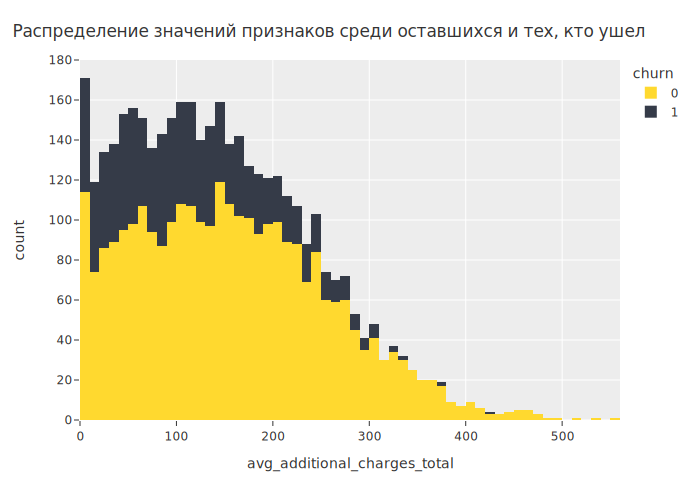

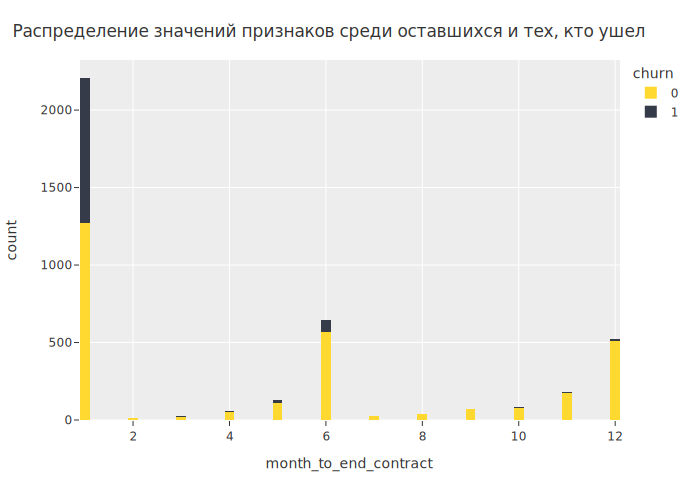

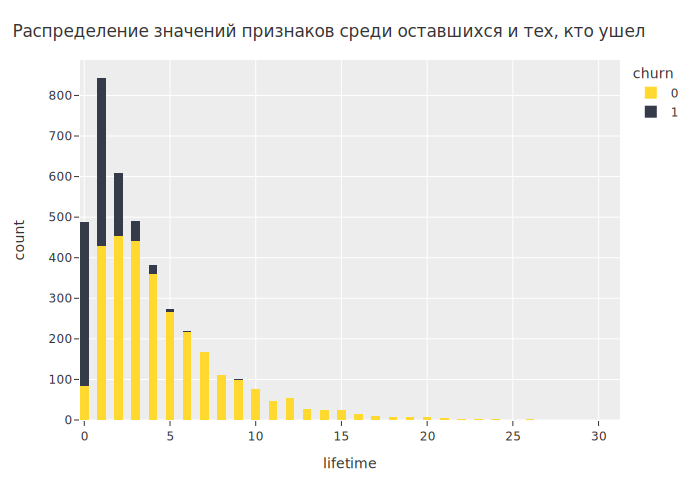

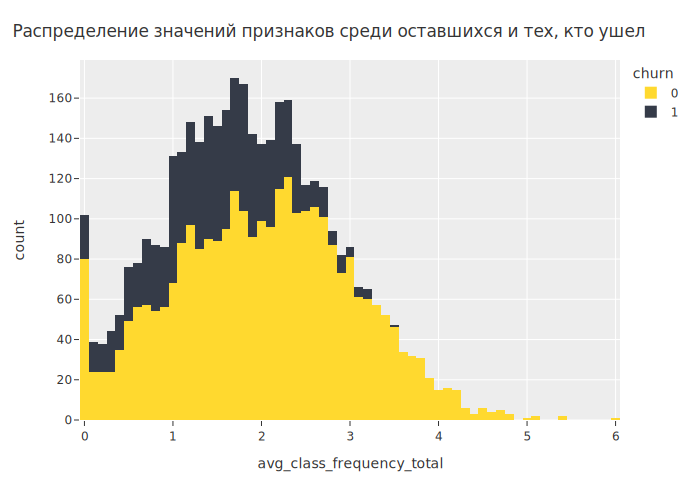

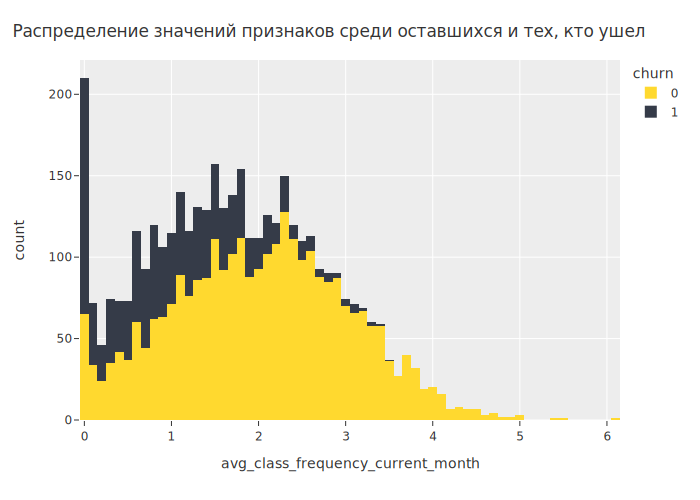

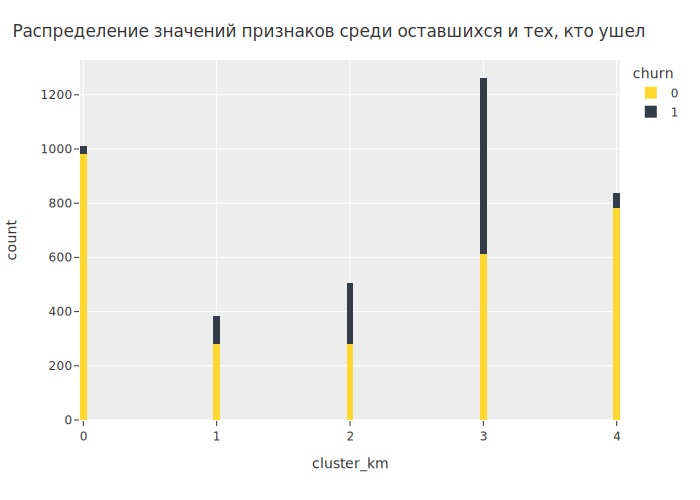

In [29]:
for i in data.drop('churn',axis=1).columns:
    fig = px.histogram(data, x=i,  color = 'churn', nbins = 100, color_discrete_sequence=['rgb(255,217,47)','#353b48'])
    fig.update_layout(title={'text': "Распределение значений признаков среди оставшихся и тех, кто ушел", 'xanchor': 'center', 'y':0.95,
        'x':0.47},
                   )
    fig.layout.template = 'ggplot2'
    fig.show('svg')

Проанализировав данные графики можно подчеркнуть следующее:
* Пол имеет примерно равное количество, и оставшихся и тех, кто ушел, примерно одинаково, поэтому он слабо влияет на значения оттока и тех остался;
* Больше тех, кто живет или работает рядом, но распредение по оттоку и оставшимся, примерно одинаково среди тех, кто живет и работает рядом и тех, кто живем и работает неблизко;
* Чуть больше, тех, кто не является пришел по партнерской программе, но отток среди них больше;
* Тех кто пришел не по акции гораздо больше, также и больше оттока среди данной группы;
* Тех, чей телефон предоставлен больше, но данный признак не влияет на отток;
* Те, кто берут абонемент на долгий период, имеют гораздо ниже процент оттока;
* Те, кто посещал групповые занятия, уходят меньше;
* Начиная с 26 лет, люди более серьезно занимаются, и гораздно реже уходят, до 26 лет, процент оттока больше, оставшихся;
* По всей дополнительной суммарной выручке, можно сказать, что данный признак не влияет на отток;
* Тех у кого срок до конца действующего абонемента месяц, у них гораздно выше отток;
* Те, у кого с момента обращения месяц, гораздо чаще входят в группу оттока, второй месяц , также, но процент оттока уже меньше, начиная с 3 месяца, процент оттока ниже;
* Те, кто ходят в среднем 3 раза в неделю с начала действия абонемента, очень редко уходят, до 3 раз в неделю, процент оттока выше;
* Те, кто ходят в среднем 3 раза в неделю за предыдущий месяц, очень редко уходят, до 3 раз в неделю, процент оттока выше;

### 2.4 Матрица корреляции

Создадим матрицу корреляции:

In [10]:
correlation = data.corr()

Посмотрим на нее в форме таблице:

In [11]:
correlation

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.00,0.01,-0.01,-0.01,-0.01,0.00,0.02,0.01,-0.01,-0.00,0.01,0.01,0.01,0.00
near_location,0.01,1.00,-0.01,0.21,-0.02,0.15,0.15,0.06,0.04,0.14,0.07,0.04,0.06,-0.13
partner,-0.01,-0.01,1.00,0.45,0.01,0.31,0.02,0.05,0.02,0.29,0.06,0.02,0.05,-0.16
promo_friends,-0.01,0.21,0.45,1.00,0.00,0.24,0.12,0.05,0.04,0.24,0.07,0.03,0.05,-0.16
phone,-0.01,-0.02,0.01,0.00,1.00,-0.01,-0.01,-0.01,0.01,-0.01,-0.02,0.01,0.01,-0.00
contract_period,0.00,0.15,0.31,0.24,-0.01,1.00,0.17,0.14,0.11,0.97,0.17,0.10,0.16,-0.39
group_visits,0.02,0.15,0.02,0.12,-0.01,0.17,1.00,0.08,0.03,0.16,0.08,0.06,0.08,-0.18
age,0.01,0.06,0.05,0.05,-0.01,0.14,0.08,1.00,0.08,0.13,0.16,0.12,0.18,-0.40
avg_additional_charges_total,-0.01,0.04,0.02,0.04,0.01,0.11,0.03,0.08,1.00,0.11,0.08,0.04,0.08,-0.20
month_to_end_contract,-0.00,0.14,0.29,0.24,-0.01,0.97,0.16,0.13,0.11,1.00,0.16,0.09,0.15,-0.38


Построим тепловую карту для матрицы:

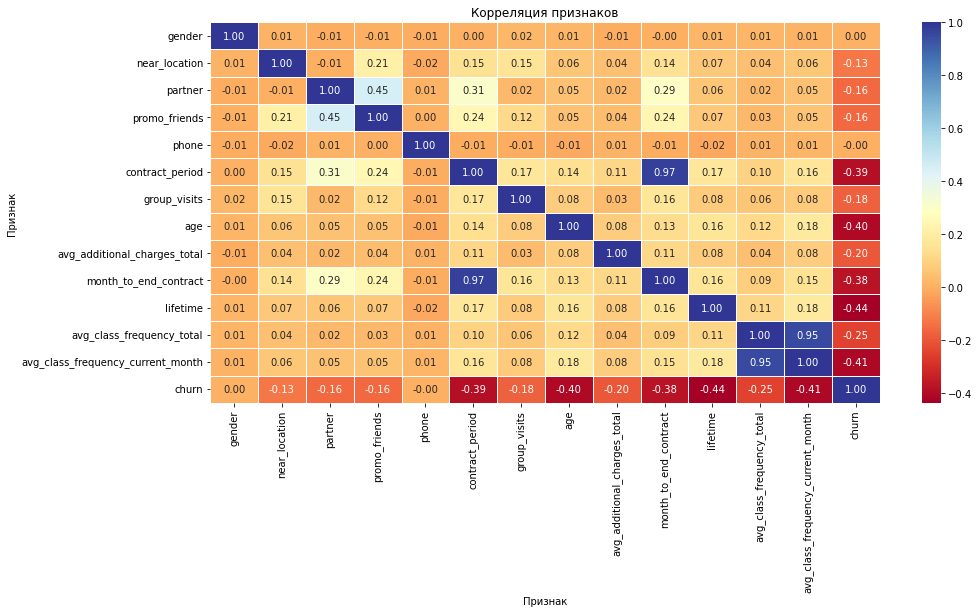

In [12]:
plt.figure(figsize=(15, 7))
plt.title('Корреляция признаков')
sns.heatmap(correlation, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlBu')
plt.xlabel('Признак')
plt.ylabel('Признак')
plt.show()


Изучив данные тепловой карты, можно заметить следующее:
* **gender** никак не коррелирует с другими признаками;
* **phone** никак не коррелируют с другими признакми;
* **contract_period** - **month_to_end_contract** являются мультиколлинеарными признаками;
* **avg_class_frequency_current_month** - **avg_class_frequency_total** являются мультиколлинеарными признаками;
* **near_location**, **partner**, **promo_friends**, **group_visits**, **avg_additional_charges_total**, **avg_class_frequency_total**. Корреляция в диапазоне -(0,1-0,25) - слабая.  
* **contract_period**, **age**, **month_to_end_contract**, **lifetime**, **avg_class_frequency_current_month**. Корреляция в диапазоне -(0,38-0,44) - Выше слабой, но не сильняя.

### 2.5 Вывод

В ходе исследовательского анализа данных (EDA) было выявлено следующее:
* Примерно равное количество данных между мужчинами и женщинами;
* 85% проживают или работают рядом с фитнес-центром;
* Примерно равно количество данных между сотрудниками компаний-партнеров и кто не является партнером;
* 31% пришли по акции "приведи друга";
* 90% предоставили данные своих контактных номеров;
* 4.7% средняя длительность действующего абонемента;
* 41% посещает групоовые занятия;
* 29 лет в среднем , занимающимся в фитнес-центре;
* 147 денежных единиц в среднем сумарная выручка от других услуг фитнес-центра;
* 4.3 месяца в среднем до окончания текущего действующего абонемента;
* 3.7 месяца в среднем время с момента первого обращения в фитнес-центр;
* около 2 раз в неделю в среднем посещают за все время с начала действия абонемента;
* около 2 раз в неделю в среднем посещают за прошлый месяц;
* 27% отток в текущем месяце.

Также на основе тепловой карты было выявлено:
* contract_period - month_to_end_contract являются мультиколлинеарными признаками;
* avg_class_frequency_current_month - avg_class_frequency_total являются мультиколлинеарными признаками;
* gender никак не коррелирует с другими признаками;
* phone никак не коррелируют с другими признакми;

## Этап 3. Модель прогнозирования оттока клиентов

### 3.1 Разбиение данных на обучающую и валидационную выборку функцией train_test_split()

В первую очередь следует разделить целевую пеменную (y) от признаков( матрицы Х) :

In [13]:
X = data.drop('churn', axis = 1)
y = data['churn']
# Разделим выборку на обучающую и валидационную в соотношении 80 к 20, параметр random_state выставим как 0:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Создадим объект класса StandardScaler и применим его к обучающей выборке:
scaler = StandardScaler()
scaler.fit(X_train)
# Преобразуем обучающие и валидационные наборы данных:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Таким образом разделили выборку на целевую переменную(y) от признаков(матрицы X), разделили данные в соотношение 80 к 20, стандартизировали наборы данных.

### 3.2 Обучение модели на train-выборке двумя способами

#### 3.2.1 Логистическая регрессия

In [14]:
# Зададим алгоритм для нашей модели
log_reg = LogisticRegression(random_state = 0)
# Обучим модель
log_reg.fit(X_train_st, y_train)
# Воспользуемся уже обученной моделью, чтобы сделать прогнозы
log_reg_predictions = log_reg.predict(X_test_st)
log_reg_probabilities = log_reg.predict_proba(X_test_st)[:,1]
# Выведем метрики для полученного прогноза
print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_reg_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_reg_predictions)))
print('Recall: {:.2f}'.format((recall_score(y_test, log_reg_predictions))))
print('F1: {:.2f}'.format(f1_score(y_test, log_reg_predictions)))
print()

Метрики для модели логистической регрессии:
Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84



#### 3.2.2 Случайный лес

In [15]:
# Зададим алгоритм для нашей модели
rand_for =  RandomForestClassifier(n_estimators = 100, random_state = 0)
# Обучим модель
rand_for.fit(X_train_st, y_train)
# Воспользуемся уже обученной моделью, чтобы сделать прогнозы
rand_for_predictions = rand_for.predict(X_test_st)
rand_for_probabilities = rand_for.predict_proba(X_test_st)[:,1]
# Выведем метрики для полученного прогноза
print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rand_for_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rand_for_predictions)))
print('Recall: {:.2f}'.format((recall_score(y_test, rand_for_predictions))))
print('F1: {:.2f}'.format(f1_score(y_test, rand_for_predictions)))
print()

Метрики для модели логистической регрессии:
Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83



### 3.3 Оценка метрик

* Доля правильных ответов(Accuracy) у обоих моделей 0.92;
* Точность(Precision) у модели логистическая регрессия 0.85 против 0.84 у случайного леса;
* Полнота (Recall) у модели логистическая регрессия 0.83 против 0.82 у случайного леса;
* F1-мера у модели логистическая регрессия 0.84 против 0.83 у случайного леса.

Таким образом обе модели показали хорошие результаты, но логистическая регрессия чуть выигрышнее.

### 3.4 Вывод

Данные были разбиты на обучающую и валидационную выборку функцией, к ходе которой были обучены модели на train-выборке двумя способами : логистической регрессией и случайным лесом, с помощью было установлено, что модели показади достойные результаты, но логистическая регрессия слегка опередила модель случайного леса.

## Этап 4. Кластеризация клиентов

### 4.1 Стандартизация данных

In [16]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Провели стандартизацию, дальше построим матрицу расстояний и нарисуем дендограмму.

### 4.2 Матрица расстояний и дендрограмма 

Сохраним в переменную матрицу расстояний:

In [17]:
linked = linkage(X_sc, method = 'ward')

Нарисуем дендограмму:

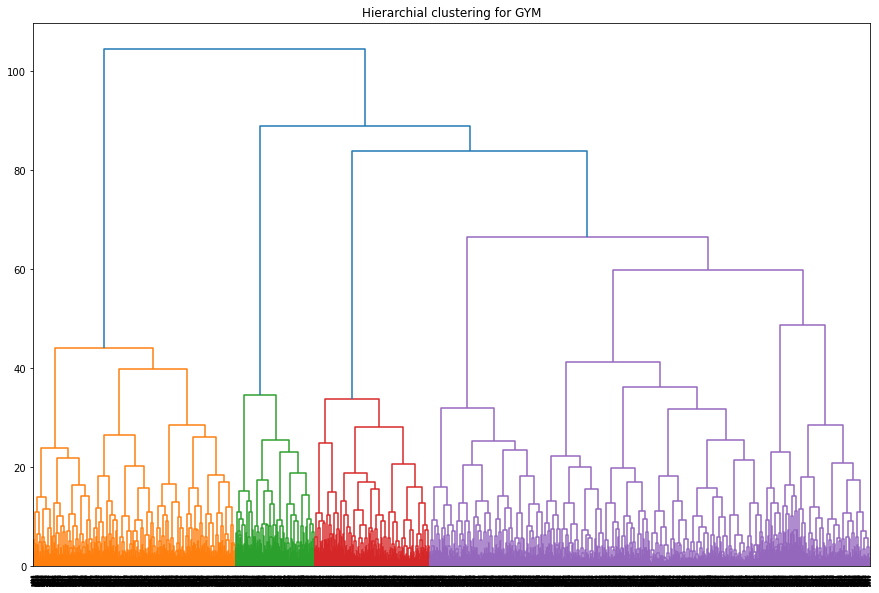

In [18]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

На основании полученной дендограммы можно предположить 4 кластера, различных по цвету.

### 4.3 Обучение модели кластеризации на основании алгоритма K-Means

In [19]:
# задаём число кластеров, равное 5
km = KMeans(n_clusters = 5, random_state=0) 
# спрогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc) 
# сохраним метки кластера в поле нашего датасета
data['cluster_km'] = labels

Посмотрим на итоговый датасет:

In [20]:
data.sample(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
121,0,1,1,1,1,1,0,25,254.80,1.00,1,0.46,0.45,0,3
1649,1,1,0,0,1,6,1,31,362.90,6.00,2,2.70,2.62,0,4


Успешно обучили модель кластеризации на основании алгоритма K-Means

### 4.4 Средние значения признаков для кластеров

Посмотрим на средние значения для кластеров:

In [21]:
data.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


**Описание кластеров:**

* Кластер 0
    * Отток - 3% -Наименьший из всех;
    * Наибольшая доля тех, кто ходит по партнерской программе, 78%;
    * Наибольшая доля тех, кто пришел по акции "Приведи друга", 57%;
    * Наибольшая длительность текущего абонемента, в среднем около 11 месяцев;
    * Больше чем другие кластеры посещали групповые тренировки;
    * 10 месяцев до конца срока действия абонемента
    
    
* Кластер 1
    * Отток - 27%;
    * Нет информации по данным контактного номера
    
    
* Кластер 2
    * Отток - 44% ;
    * Живут или работают далеко от фитнес-центра;
    * Наименьшее количество пришедших по акции "Приведи друга";
    * Реже всех посещают групповые занятия
    
    
* Кластер 3
    * Отток - 51%;
    * Живут или работают рядом все;
    * Наименьшая длительность действующего абонемента;
    * Наименьшее время с момента первого обращения в фитнес-центр (в месяцах);
    * Реже всех посещают в неделю;
    * Реже всех посещали в неделю за предыдущий месяц
    
    
* Кластер 4
    * Отток - 7%;
    * Наиболее старшая группа;
    * Больше всех оставляют денег с допольнительных услуг;
    * Наиболеее долго ходят в фитнес-центр;
    * Больше всех посешают в неделю;
    * Больше всех посещали в неделю в прошлом месяце

### 4.5 Распределения признаков для кластеров

Построим столбчатые гистограммы для 'gender', 'near_location', 'partner', 'promo_friends', 'contract_period':

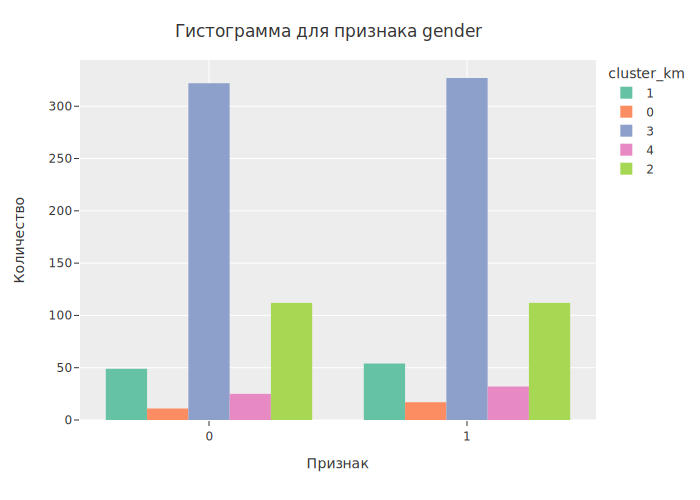

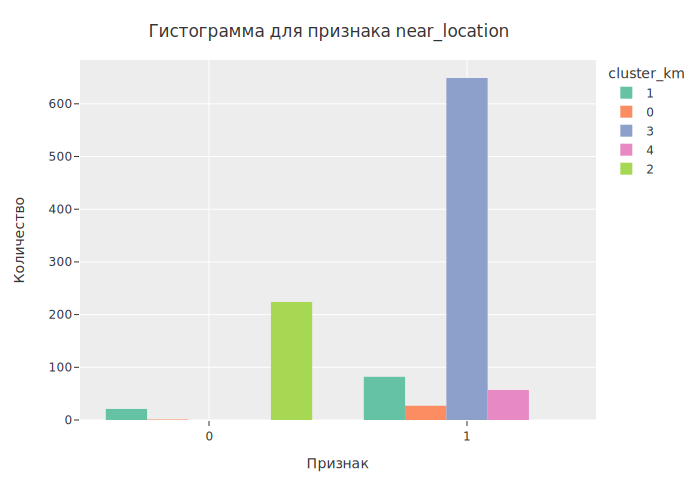

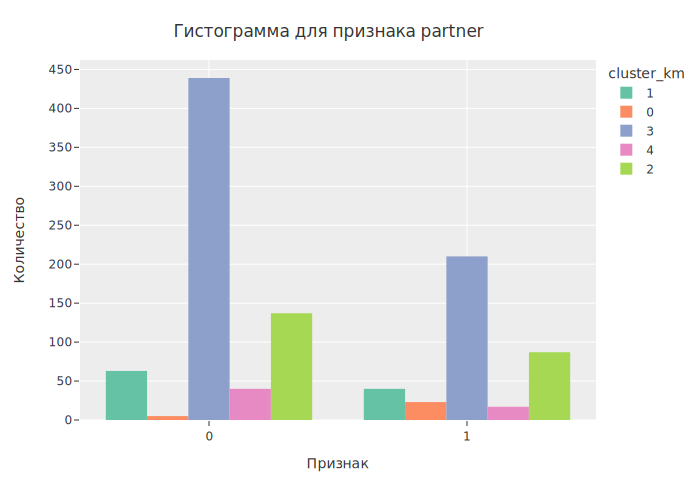

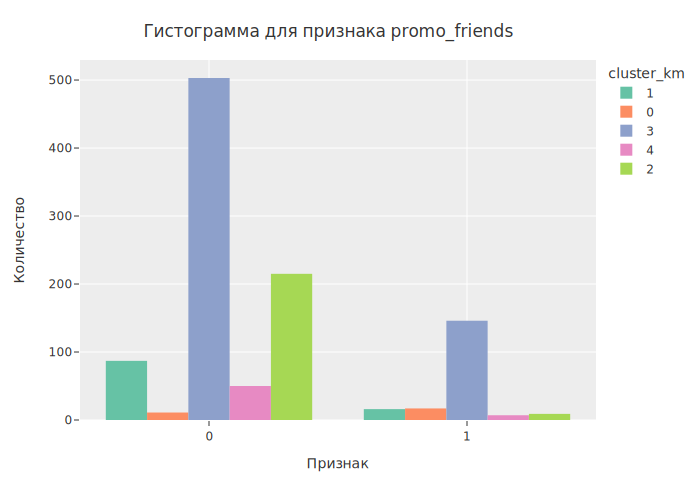

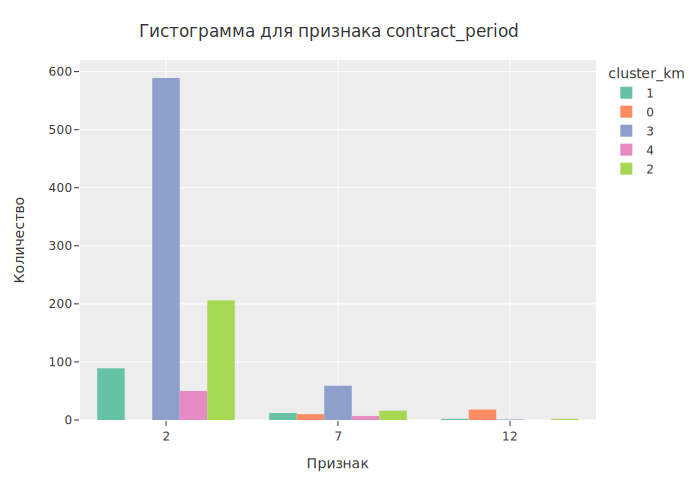

In [22]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    fig = px.histogram(data, x=column, barmode='group', y = 'churn', color = 'cluster_km',color_discrete_sequence= px.colors.qualitative.Set2)
    fig.update_layout(title={'text': 'Гистограмма для признака '+ str(column), 'xanchor': 'center', 'y':0.95,
        'x':0.47}, xaxis_title='Признак', yaxis_title='Количество'
                   )
    fig.layout.template = 'ggplot2'
    fig.show('svg')

Для month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month' построим боксплоты:

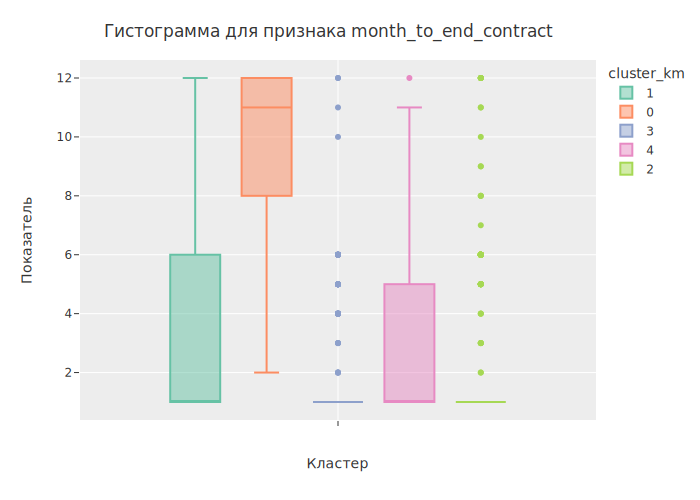

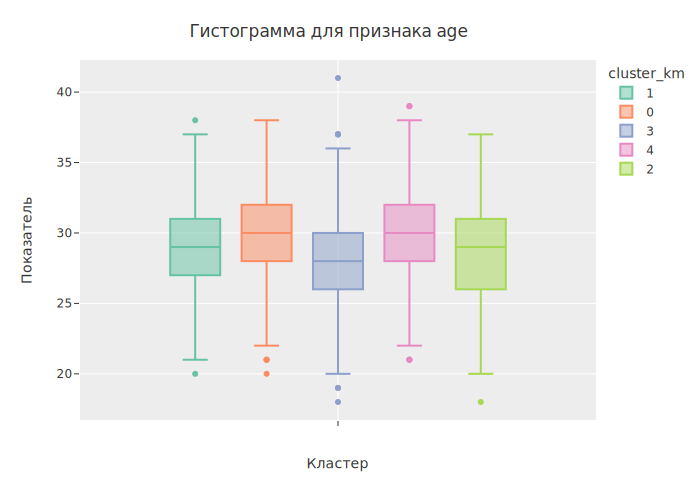

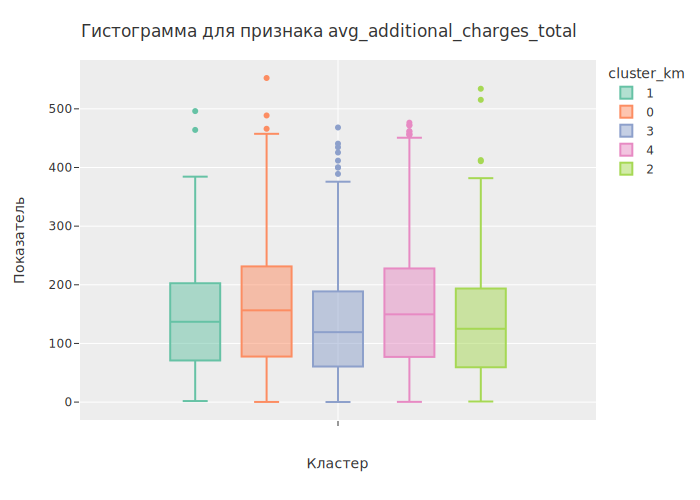

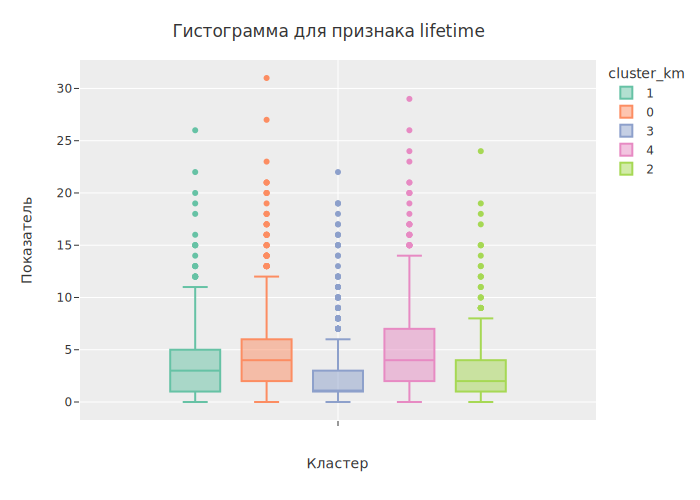

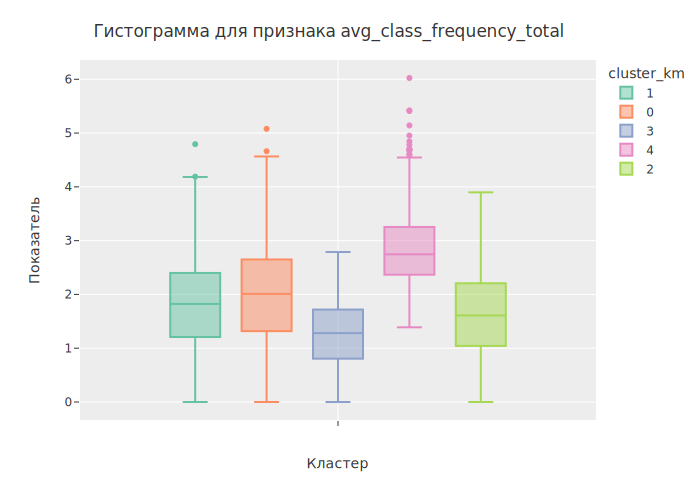

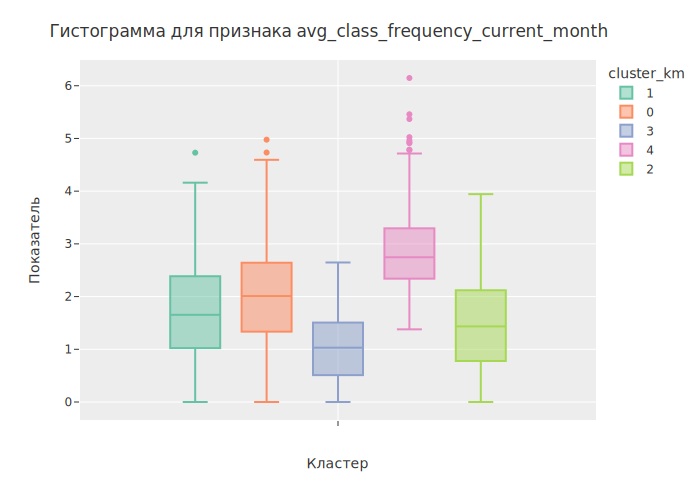

In [23]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    fig = px.box(data, y=column,color = 'cluster_km',color_discrete_sequence= px.colors.qualitative.Set2)
    fig.update_layout(title={'text': 'Гистограмма для признака '+ str(column), 'xanchor': 'center', 'y':0.95,
        'x':0.47}, xaxis_title='Кластер', yaxis_title='Показатель'
                   )
    fig.layout.template = 'ggplot2'
    fig.show('svg')

Проанализировав данные графики можно подчернкуть следующее:
* Данные по полу примерно равны, единственное в 4 кластере, чуть больше 1 признака;
* По расположению рядом с работой и домом, можно заметить, что 2 кластер отсустсвует, также отсуствует 3 кластер у тех, кто живем и работаем не рядом;
* 0 кластер сильно выделяется среди, тех, кто пришел по программе партнеров, 3 же кластер выделяется среди тех, кто не пришел по данной программе;
* 3 кластер имеет наибольшое количество среди тех, кто не пришел по программе "Приведи друга", по программе же приведи друга отличается 0 кластер;
* 0 кластер сильно выделяется среди продолжительности действующих абонементов, среди тех, у кого он на 12 месяцев;
* По медианому значению выделяется 0 кластер, с 11 месяцами до конца действия абонемента, у других кластеров медианное значение составляет 1 месяц;
* у 3 кластера встречаются выбросы выше 7 месяцев;
* у 4 кластера медианное значение посещений в неделю около 3, также есть те, кто ходит и 6 раз в неделю;
* 4 кластер выделяется по выбросам посещений в неделю за прошедщий месяц, около 6 раз в неделю.


### 4.6 Доля оттока по кластерам

Вспомним сколько процентов уходят из каждого кластера:

In [24]:
per_of_churn_in_class = ((data.query('churn == 1').groupby('cluster_km')['churn'].count() 
                          / data.groupby('cluster_km')['churn'].count() * 100)
                         .to_frame().rename(columns={'churn':'%_of_churn_in_clasters'}))
per_of_churn_in_class = per_of_churn_in_class.reset_index()
per_of_churn_in_class['cluster_km'] = per_of_churn_in_class['cluster_km'].astype('str')
per_of_churn_in_class

,cluster_km,%_of_churn_in_clasters
0,0,2.77
1,1,26.75
2,2,44.36
3,3,51.43
4,4,6.80


Посмотрим также визуально:

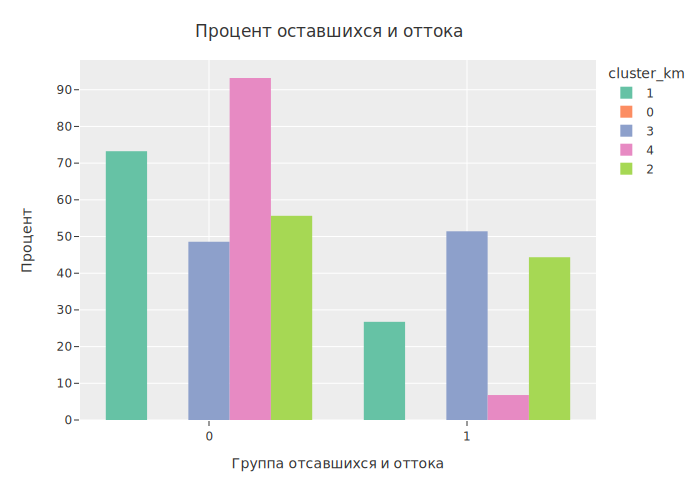

In [25]:
fig = px.histogram(data, x='churn', barmode='group', y = 'cluster_km', color = 'cluster_km',histnorm='percent',color_discrete_sequence= px.colors.qualitative.Set2)
fig.update_layout(title={'text': 'Процент оставшихся и оттока', 'xanchor': 'center', 'y':0.95,
        'x':0.47}, xaxis_title='Группа отсавшихся и оттока', yaxis_title='Процент'
                   )
fig.layout.template = 'ggplot2'
fig.show('svg')

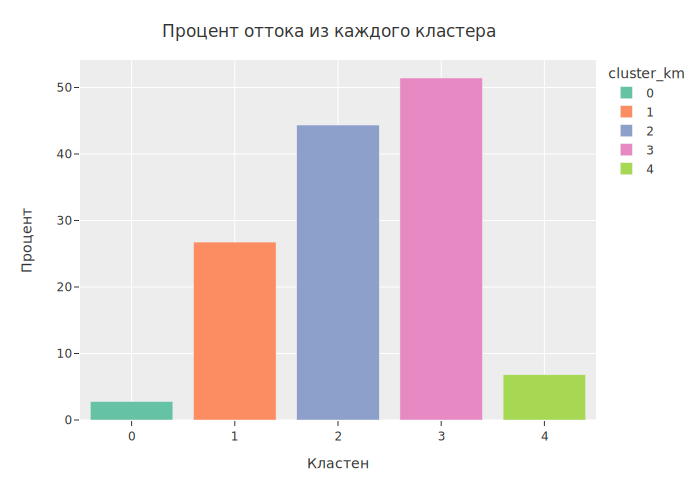

In [26]:
fig = px.bar(per_of_churn_in_class,x ='cluster_km', y = '%_of_churn_in_clasters', color = 'cluster_km',color_discrete_sequence= px.colors.qualitative.Set2)
fig.update_layout(title={'text': 'Процент оттока из каждого кластера', 'xanchor': 'center', 'y':0.95,
        'x':0.47}, xaxis_title='Кластен', yaxis_title='Процент'
                   )
fig.layout.template = 'ggplot2'
fig.show('svg')

Наибольшее число ушедших из 3 кластера, следом идет 2 кластер, замыкает тройку - 1 кластер. Меньше всего уходят из 0 кластера и 4 кластера.

Теперь посмотрим долю ушедших по кластерам:

In [27]:
per_of_all_clust = (data.query('churn == 1').groupby('cluster_km')['churn'].count() 
                    / data.query('churn == 1').groupby('cluster_km')['churn'].count().sum() * 100).to_frame().rename(columns={'churn':'%_churn_of_all_clasters'})
per_of_all_clust

,%_churn_of_all_clasters
cluster_km,
0,2.64
1,9.71
2,21.11
3,61.17
4,5.37


Также рассмотрим визуально:

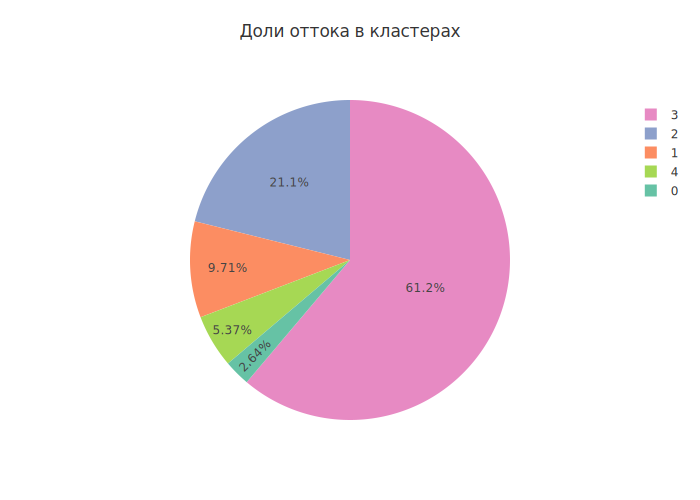

In [28]:
fig = go.Figure(data=[go.Pie(labels=per_of_all_clust.index, values=per_of_all_clust['%_churn_of_all_clasters'],marker_colors=px.colors.qualitative.Set2),]);
fig.update_layout(title={'text': 'Доли оттока в кластерах', 'xanchor': 'center', 'y':0.95,
        'x':0.5}, xaxis_title='Кластен', yaxis_title='Процент'
                   )
fig.layout.template = 'ggplot2'
fig.show('svg') ;

Здесь опять же самую большую долю по оттоку имеет кластер номер 3. Его доля больше, чем у оставшихся 4 групп вместе взятых. Самый маленький же отток у 0 кластера и 4 кластера, 2.64% и 5.37 соответственно. 1 кластер имеет отток 9.71%, 2 кластер 21.1%, что тоже, с точки зрения спорт-бизнеса немало. 

### 4.7 Вывод

Изначально была проведена стандартизация, следующим этапом которой являлось построение дендограммы, которая показала нам 4 разных цвета для кластеров. Следующим этапом стало обучение модели кластеризации на основании алгоритма K-Means, при 5 кластерах, в ходе которой успешно обучили модель кластеризации и сделан анализ по каждому кластеру и признаку:
* Данные по полу примерно равны, единственное в 4 кластере, чуть больше 1 признака;
* По расположению рядом с работой и домом, можно заметить, что 2 кластер отсустсвует, также отсуствует 3 кластер у тех, кто живем и работаем не рядом;
* 0 кластер сильно выделяется среди, тех, кто пришел по программе партнеров, 3 же кластер выделяется среди тех, кто не пришел по данной программе;
* 3 кластер имеет наибольшое количество среди тех, кто не пришел по программе "Приведи друга", по программе же приведи друга отличается 0 кластер;
* 0 кластер сильно выделяется среди продолжительности действующих абонементов, среди тех, у кого он на 12 месяцев;
* По медианому значению выделяется 0 кластер, с 11 месяцами до конца действия абонемента, у других кластеров медианное значение составляет 1 месяц;
* у 3 кластера встречаются выбросы выше 7 месяцев;
* у 4 кластера медианное значение посещений в неделю около 3, также есть те, кто ходит и 6 раз в неделю;
* 4 кластер выделяется по выбросам посещений в неделю за прошедщий месяц, около 6 раз в неде
    
 Что касаемо оттока, то 3 кластер по оттоку наибольший. Самые лояльные посетители фитнес центров в 4 и 0 кластерах.

## Этап 5. Вывод и рекомендации

В нашем распоряжении был датасет фитнес-центров «Культурист-датасаентист», который содержал 4000 строк и 14 столбцов, в ходе исследования были сделаны следущие выводы:
* На этапе изучения основных статистических показателей:
    * Примерно равное количество данных между мужчинами и женщинами;
    * 85% проживают или работают рядом с фитнес-центром;
    * Примерно равно количество данных между сотрудниками компаний-партнеров и кто не является партнером;
    * 31% пришли по акции "приведи друга";
    * 90% предоставили данные своих контактных номеров;
    * 4.7% средняя длительность действующего абонемента;
    * 41% посещает групоовые занятия;
    * 29 лет в среднем , занимающимся в фитнес-центре;
    * 147 денежных единиц в среднем сумарная выручка от других услуг фитнес-центра;
    * 4.3 месяца в среднем до окончания текущего действующего абонемента;
    * 3.7 месяца в среднем время с момента первого обращения в фитнес-центр;
    * около 2 раз в неделю в среднем посещают за все время с начала действия абонемента;
    * около 2 раз в неделю в среднем посещают за прошлый месяц;
    * 27% отток в текущем месяце.
* Изучив группы оставшихся и оттока, было выявлено :
    * По полу примерное равное значение среднего;
    * Ближе живущие и работающие слегка реже попадают в отток;
    * Сотрудники компаний-партнеров реже уходят в отток;
    * Отток меньше у тех, кто пришел по акции "приведи друга";
    * Нет различий между группами, среди тех, кто оставил телефоны;
    * Средний возраст, у тех, кто остался 30 лет, в то время, те кто уходят имеют средний возраст на 3 года меньше, 27 лет;
    * Допольнительная выручка больше у тех, кто остался, 158 ден.ед, против 115 ден.ед;
    * Средний срок действия абонемента у тех, кто остался больше 5 месяцев, в то время как у тех кто уходит, средний срок действия абонемента, меньше 2 месяцев;
    * Средний срок  с времени первого обращения около 5 месяцев,среди тех, кто остался, в то время как у оттока, менее месяца;
    * Те кто остался в среднем имеют выше среднюю частоту посещений в неделю, чем те, у которых отток;
    * Среди тех, кто отсался, почти в 2 раза выше среднее значение средней частоты посещений в неделю за предыдущий месяц;
 
Следующим этапом было изучены две модели прогнозирования оттока клиентов, в ходе которых данные были разбиты на обучающую и валидационную выборку функцией, к ходе которой были обучены модели на train-выборке двумя способами : логистической регрессией и случайным лесом, с помощью было установлено, что модели показади достойные результаты, но логистическая регрессия слегка опередила модель случайного леса.

При класстеризации клиентов была проведена стандартизация, следующим этапом которой являлось построение дендограммы, которая показала нам 4 разных цвета для кластеров. Следующим этапом стало обучение модели кластеризации на основании алгоритма K-Means, при 5 кластерах, в ходе которой успешно обучили модель кластеризации и сделан анализ по каждому кластеру и признаку:

* Кластер 0
    * Отток - 3% -Наименьший из всех;
    * Наибольшая доля тех, кто ходит по партнерской программе, 78%;
    * Наибольшая доля тех, кто пришел по акции "Приведи друга", 57%;
    * Наибольшая длительность текущего абонемента, в среднем около 11 месяцев;
    * Больше чем другие кластеры посещали групповые тренировки;
    * 10 месяцев до конца срока действия абонемента
    
    
* Кластер 1
    * Отток - 27%;
    * Нет информации по данным контактного номера
    
    
* Кластер 2
    * Отток - 44% ;
    * Живут или работают далеко от фитнес-центра;
    * Наименьшее количество пришедших по акции "Приведи друга";
    * Реже всех посещают групповые занятия
    
    
* Кластер 3
    * Отток - 51%;
    * Живут или работают рядом все;
    * Наименьшая длительность действующего абонемента;
    * Наименьшее время с момента первого обращения в фитнес-центр (в месяцах);
    * Реже всех посещают в неделю;
    * Реже всех посещали в неделю за предыдущий месяц
    
    
* Кластер 4
    * Отток - 7%;
    * Наиболее старшая группа;
    * Больше всех оставляют денег с допольнительных услуг;
    * Наиболеее долго ходят в фитнес-центр;
    * Больше всех посешают в неделю;
    * Больше всех посещали в неделю в прошлом месяце
 
 
 **Рекомендации:**
 * Расширять партнерские программы, устанавливать сотрудничество с новыми компаниями;
 * Продлить действие акции "Приведи друга";
 * Внедрять новые маркетинговые кампании;
 * Предлагать людям более старшего возраста интересные групповые занятия;
 * Расширить кухонное меню, внести белковые блюда, так и блюда для вегетерианцев;
 * Внедрить интересные фитнес программы;
 * Внести день бесплатного тренера для новичков;
 * Внести программу лояльности для тех, кто занимается на протяжении долго времени;
 * Увелить рекламу в районах фитнес-центров